In [29]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2

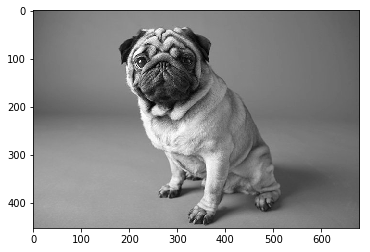

In [30]:
# Reading as image
img = cv2.imread('C:/Users/Vidush/Pictures/pug.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')
plt.show()
%matplotlib inline

In [31]:
img.shape

(453, 680)

In [32]:
#Keras expects batches of images, so we have to add a dimension to trick it into a batch
img_batch = img.reshape(1, img.shape[0], img.shape[1],1)
img_batch.shape

(1, 453, 680, 1)

In [33]:
img_batch.shape[1:]

(453, 680, 1)

In [34]:
model = Sequential()

#random weight initialaization
model.add(Convolution2D(1,(15,15), padding = 'valid', input_shape = img_batch.shape[1:]))

#(453 + 2*0 -15)/1 + 1 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 439, 666, 1)       226       
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [35]:
conv_img = model.predict(img_batch)

In [36]:
conv_img.shape

(1, 439, 666, 1)

[[172.93018 174.90643 175.28891 ... 154.31197 153.7112  154.48239]
 [177.30666 178.14098 178.71616 ... 156.66472 156.69582 157.17998]
 [176.61479 178.00182 178.82047 ... 155.38937 155.11772 155.32318]
 ...
 [264.07812 263.08264 266.47522 ... 188.71863 189.22612 192.72495]
 [258.89432 259.53983 261.76782 ... 188.76927 189.98982 193.69841]
 [260.09598 261.32193 261.13498 ... 190.5485  191.8283  194.53839]]


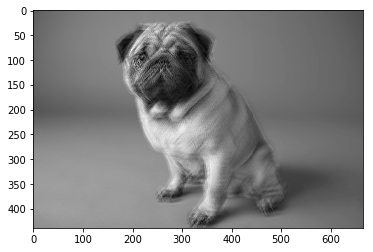

In [37]:
conv_img_show = conv_img.reshape(conv_img.shape[1], conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show, cmap = 'gray')
plt.show()

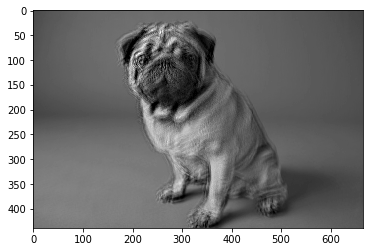

In [38]:
# Add relu unit

model2 = Sequential()

#random weight initialaization
model2.add(Convolution2D(1,(15,15), padding = 'valid', input_shape = img_batch.shape[1:]))
model2.add(Activation('relu'))

conv_img = model2.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1], conv_img.shape[2])
plt.imshow(conv_img_show, cmap = 'gray')
plt.show()

W1113 00:18:10.526953  3272 deprecation_wrapper.py:119] From c:\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 439, 666, 1)       226       
_________________________________________________________________
activation_5 (Activation)    (None, 439, 666, 1)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 219, 333, 1)       0         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


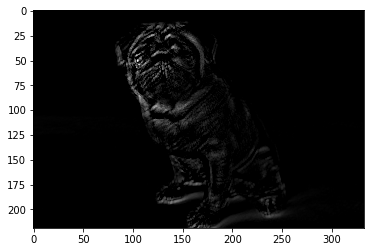

In [39]:
# Combining both relu unit and maxpooling

model3 = Sequential()

#random weight initialaization
model3.add(Convolution2D(1,(15,15), padding = 'valid', input_shape = img_batch.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.summary()
conv_img = model3.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1], conv_img.shape[2])
plt.imshow(conv_img_show, cmap = 'gray')
plt.show()